In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
vacancies_prepared = pd.read_csv('vacancies_prepared.csv')

In [4]:
vacancies_prepared.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
y = vacancies_prepared['salary']
X = vacancies_prepared.drop('salary', axis=1)

In [6]:
# Разделяем датасет на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
# Определяем список моделей для обучения
estimators = [GradientBoostingRegressor(), Lasso(), RandomForestRegressor()]
# Определяем список из словарей для значений гиперпараметров для каждой модели
parameters =[{'learning_rate': [0.001,0.0001,0.02],
                  'subsample': [0.9, 0.5, 0.2, 0.1],
                  'n_estimators': [100,500,1000, 1500, 2000],
                  'max_depth': [10, 20, 30, 40]},
             {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]},
             {'n_estimators': [100,500,1000, 1500, 2000],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 20, 30, 40],
              'min_samples_split': [2, 5, 10]}
            ]

In [8]:
from sklearn.model_selection import GridSearchCV
best_estimators = []
for i in range(len(estimators)):
    grid_GBR = GridSearchCV(estimator=estimators[i], param_grid = parameters[i], cv = 2, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
    # Кросс-валидация
    grid_GBR.fit(X_train, y_train)
    print(estimators[i])
    print("The best estimator across ALL searched params:", grid_GBR.best_estimator_)
    print("The best score across ALL searched params:", grid_GBR.best_score_)
    print("The best parameters across ALL searched params:", grid_GBR.best_params_)
    print('\n------------------------------------------------')
    # Добавляем в список модель с лучшим скором
    best_estimators.append(grid_GBR.best_estimator_)

GradientBoostingRegressor()
The best estimator across ALL searched params: GradientBoostingRegressor(learning_rate=0.001, max_depth=10, n_estimators=2000,
                          subsample=0.2)
The best score across ALL searched params: -34069.89486002404
The best parameters across ALL searched params: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 2000, 'subsample': 0.2}

------------------------------------------------
Lasso()
The best estimator across ALL searched params: Lasso(alpha=0.03)
The best score across ALL searched params: -38459.667660180756
The best parameters across ALL searched params: {'alpha': 0.03}

------------------------------------------------
RandomForestRegressor()
The best estimator across ALL searched params: RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10)
The best score across ALL searched params: -33933.739466900006
The best parameters across ALL searched params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samp

GradientBoostingRegressor() MSE: 815195753.75
Lasso() MSE: 871219393.71
RandomForestRegressor() MSE: 711046155.82


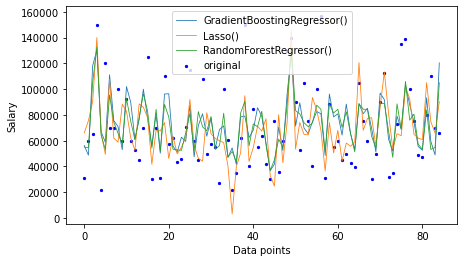

In [16]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
x_ax = range(len(y_test))
# Строим точечный график тестовых данных
plt.figure(figsize=(7,4))
plt.scatter(x_ax, y_test, s=5, color='blue', label='original')
# Итерируем по всем моделям с лучшими параметрами
for i in range(len(best_estimators)):
    ypred = best_estimators[i].predict(X_test)
    mse = mean_squared_error(y_test,ypred)
    # Выводим среднюю квадратическую ошибку
    print(str(estimators[i]) + ' MSE: %.2f' % mse) 
    # Строим график предсказаний для каждой модели
    plt.plot(x_ax, ypred, lw=0.8, label=estimators[i])
    plt.legend()
plt.xlabel('Data points')
plt.ylabel('Salary')
plt.savefig('model_graphs.png')
plt.show()   